In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import gdown
import zipfile
import os
import folium

In [4]:
# Loading data from GDrive.
file_id = "110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.csv"
gdown.download(url, file_extension, quiet=False)
df = pd.read_csv(file_extension, sep=",")

Downloading...
From (original): https://drive.google.com/uc?id=110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua
From (redirected): https://drive.google.com/uc?id=110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua&confirm=t&uuid=386f9193-597c-4a19-9b77-0b3974049459
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 252M/252M [00:07<00:00, 34.6MB/s] 


In [5]:
df.head()

,ad_id,result,job_field,position_category,position,education_level,work_time,vacancies,city,institution,...,date_announced,views,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract
0,130994,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,0.5,1,Olesno,Powiatowy Inspektorat Weterynarii w Oleśnie,...,2023-12-02,183.0,2023,1.0,1.0,NaN,nie podano wynagrodzenia,0.666667,0.064683,1.19
1,130970,0,tech/construction,stanowiska samodzielne,starszy specjalista,3,1.0,1,Bydgoszcz,Wojewódzki Inspektorat Nadzoru Budowlanego w B...,...,2023-12-01,296.0,2023,0.0,4.0,NaN,nie podano wynagrodzenia,0.580645,0.036010,0.50
2,130898,1,vet,stanowiska samodzielne,asystent,2,1.0,1,Chrzanów,Powiatowy Inspektorat Weterynarii w Chrzanowie,...,2023-11-30,701.0,2023,0.0,18.0,NaN,"4400,00 zł brutto",0.833333,0.101215,NaN
3,130919,0,uniformed services,stanowiska samodzielne,specjalista,4,1.0,1,Warszawa,Komenda Stołeczna Policji w Warszawie,...,2023-11-30,456.0,2023,NaN,NaN,NaN,"4940,34 zł brutto",NaN,NaN,NaN
4,130837,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,1.0,1,Świdnica,Powiatowy Inspektorat Weterynarii w Świdnicy,...,2023-11-29,228.0,2023,1.0,2.0,10268.888889,nie podano wynagrodzenia,0.833333,0.000000,3.00


##### Merging with Teryt - data about location for geopandas.

In [6]:
# Loading data.
file_id = "16YMXsOSYkQLncm0nqfqw5Z7mAW8TF-ql"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.csv"
gdown.download(url, file_extension, quiet=False)
teryt = pd.read_csv(file_extension, sep=",")

Downloading...
From: https://drive.google.com/uc?id=16YMXsOSYkQLncm0nqfqw5Z7mAW8TF-ql
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 20.7MB/s]


In [7]:
# Merging data.
df_with_teryt = pd.merge(df, teryt, left_on=['ad_id'], right_on=['job_id'], how="left")

# Name changes.
df_with_teryt["voivodeship"] = df_with_teryt["WOJ"]
df_with_teryt["district"] = df_with_teryt["POW"]
df_with_teryt.drop(columns=[
    "WOJ", "POW", "job_id"
], inplace=True)
df_with_teryt.head()

,ad_id,result,job_field,position_category,position,education_level,work_time,vacancies,city,institution,...,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract,voivodeship,district
0,130994,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,0.5,1,Olesno,Powiatowy Inspektorat Weterynarii w Oleśnie,...,2023,1.0,1.0,NaN,nie podano wynagrodzenia,0.666667,0.064683,1.19,16,8
1,130970,0,tech/construction,stanowiska samodzielne,starszy specjalista,3,1.0,1,Bydgoszcz,Wojewódzki Inspektorat Nadzoru Budowlanego w B...,...,2023,0.0,4.0,NaN,nie podano wynagrodzenia,0.580645,0.036010,0.50,4,61
2,130898,1,vet,stanowiska samodzielne,asystent,2,1.0,1,Chrzanów,Powiatowy Inspektorat Weterynarii w Chrzanowie,...,2023,0.0,18.0,NaN,"4400,00 zł brutto",0.833333,0.101215,NaN,12,3
3,130919,0,uniformed services,stanowiska samodzielne,specjalista,4,1.0,1,Warszawa,Komenda Stołeczna Policji w Warszawie,...,2023,NaN,NaN,NaN,"4940,34 zł brutto",NaN,NaN,NaN,14,65
4,130837,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,1.0,1,Świdnica,Powiatowy Inspektorat Weterynarii w Świdnicy,...,2023,1.0,2.0,10268.888889,nie podano wynagrodzenia,0.833333,0.000000,3.00,2,19


### Visualisations

In [8]:
# Now I'm downloading the whole folder from GDrive, which comes as ZIP.
file_id = "1kh8xFFlBgsYcD1D4_QX3C7Z19csvCfvo"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.zip"
gdown.download(url, file_extension, quiet=False)

with zipfile.ZipFile(file_extension, 'r') as zip_ref:
    zip_ref.extractall("wojewodztwa")

# The first is the downloaded ZIP, the second is the zipped folder, and finally, the file.
shapefile_path = os.path.join("wojewodztwa", "wojewodztwa", "wojewodztwa.shp")
wojewodztwa = gpd.read_file(shapefile_path)

Downloading...
From: https://drive.google.com/uc?id=1kh8xFFlBgsYcD1D4_QX3C7Z19csvCfvo
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.zip
100%|██████████| 5.41M/5.41M [00:00<00:00, 34.0MB/s]


In [9]:
file_id = "1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.zip"
gdown.download(url, file_extension, quiet=False)

with zipfile.ZipFile(file_extension, 'r') as zip_ref:
    zip_ref.extractall("powiaty")

shapefile_path = os.path.join("powiaty", "powiaty", "powiaty.shp")
powiaty = gpd.read_file(shapefile_path)

Downloading...
From (original): https://drive.google.com/uc?id=1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw
From (redirected): https://drive.google.com/uc?id=1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw&confirm=t&uuid=a3bfbab2-dae8-4280-88bf-753e68fa49ed
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.zip
100%|██████████| 28.2M/28.2M [00:00<00:00, 41.4MB/s]


##### Merging the geopandas object with the main dataframe.

In [10]:
wojewodztwa['JPT_KOD_JE'] = wojewodztwa['JPT_KOD_JE'].astype(int)
merged_wojewodztwa = wojewodztwa.merge(df_with_teryt, left_on=['JPT_KOD_JE'], right_on=['voivodeship'], how="inner")

powiaty['JPT_KOD_JE'] = powiaty['JPT_KOD_JE'].astype(int)
merged_powiaty = powiaty.merge(df_with_teryt, left_on=['JPT_KOD_JE'], right_on=['district'], how="inner")

In [11]:
merged_wojewodztwa.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract,voivodeship,district
0,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,2023,1.0,3.052632,8040.301151,"nie mniej niż 3942,81 zł brutto",0.737527,0.110254,22.58,32,1
1,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,2023,1.0,0.000000,NaN,nie podano wynagrodzenia,1.000000,0.000000,NaN,32,7
2,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,2023,1.0,3.052632,8040.301151,"nie mniej niż 3942,81 zł brutto",0.737527,0.110254,22.58,32,10
3,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,2023,1.0,18.946429,10912.685022,"5048,00 zł brutto",0.807905,0.072635,800.13,32,62
4,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,2023,0.0,3.166667,NaN,"około 5103,00 zł brutto",0.577778,0.087912,NaN,32,62


In [22]:
# Choosing only columns of interest for visualisation.
columns_of_interest = [
    "voivodeship",
    "JPT_NAZWA_",
    "SHAPE_LENG",
    "SHAPE_AREA",
    "geometry",
    "result",
    "job_field",
    "position_category",
    "education_level",
    "year_announced",
    "salary_for_position",
    "women_percentage",
    "kandydaci",
    "fluctuation"
]
wojewodztwa_map = merged_wojewodztwa[["JPT_NAZWA_", "geometry", "fluctuation", "year_announced"]]
#wojewodztwa_map = wojewodztwa_map[wojewodztwa_map["year_announced"] == 2023]
# Aggregation.
aggregated_map = (
    wojewodztwa_map.groupby("JPT_NAZWA_")
    .agg({
        "fluctuation": "mean",
        "geometry": "first"
    })
    .reset_index()
)

# Making the df a geo df once again.
aggregated_map = gpd.GeoDataFrame(aggregated_map, geometry=aggregated_map["geometry"])

In [25]:
df_with_teryt.head(200)

,ad_id,result,job_field,position_category,position,education_level,work_time,vacancies,city,institution,...,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract,voivodeship,district
0,130994,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,0.5,1,Olesno,Powiatowy Inspektorat Weterynarii w Oleśnie,...,2023,1.0,1.000000,NaN,nie podano wynagrodzenia,0.666667,0.064683,1.19,16,8
1,130970,0,tech/construction,stanowiska samodzielne,starszy specjalista,3,1.0,1,Bydgoszcz,Wojewódzki Inspektorat Nadzoru Budowlanego w B...,...,2023,0.0,4.000000,NaN,nie podano wynagrodzenia,0.580645,0.036010,0.50,4,61
2,130898,1,vet,stanowiska samodzielne,asystent,2,1.0,1,Chrzanów,Powiatowy Inspektorat Weterynarii w Chrzanowie,...,2023,0.0,18.000000,NaN,"4400,00 zł brutto",0.833333,0.101215,NaN,12,3
3,130919,0,uniformed services,stanowiska samodzielne,specjalista,4,1.0,1,Warszawa,Komenda Stołeczna Policji w Warszawie,...,2023,NaN,NaN,NaN,"4940,34 zł brutto",NaN,NaN,NaN,14,65
4,130837,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,1.0,1,Świdnica,Powiatowy Inspektorat Weterynarii w Świdnicy,...,2023,1.0,2.000000,10268.888889,nie podano wynagrodzenia,0.833333,0.000000,3.00,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,129991,0,law,stanowiska samodzielne,inspektor,1,1.0,1,Świnoujście,Morski Oddział Straży Granicznej w Gdańsku,...,2023,NaN,NaN,NaN,"nie mniej niż 4803,66 zł brutto",NaN,NaN,NaN,32,63
196,129992,1,documents,stanowiska samodzielne,referent,2,1.0,2,Gdynia,Izba Administracji Skarbowej w Gdańsku,...,2023,1.0,10.270642,10765.779345,"4989,85 zł brutto",0.840449,0.065938,958.69,22,62
197,129998,0,tech/construction,stanowiska samodzielne,specjalista,4,1.0,1,Warszawa,Główny Urząd Nadzoru Budowlanego w Warszawie,...,2023,NaN,NaN,NaN,nie podano wynagrodzenia,NaN,NaN,NaN,14,65
198,129999,0,law,stanowiska samodzielne,starszy inspektor,4,1.0,1,Warszawa,Główny Urząd Nadzoru Budowlanego w Warszawie,...,2023,NaN,NaN,NaN,nie podano wynagrodzenia,NaN,NaN,NaN,14,65


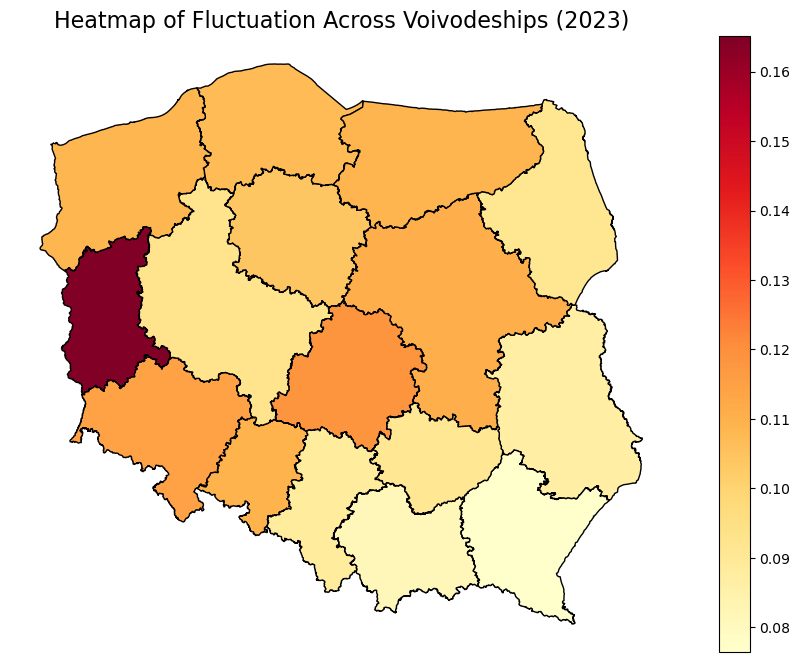

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

aggregated_map.plot(
    column="fluctuation",  # Column to visualize
    cmap="YlOrRd",         # Color map for the heatmap
    legend=True,           # Add a legend for the color scale
    edgecolor="black",     # Black borders around polygons
    ax=ax                  # Matplotlib axis
)

ax.set_title("Heatmap of Fluctuation Across Voivodeships (2023)", fontsize=16)
ax.axis("off")  # Turn off the axis for a cleaner look

plt.show()